In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from google.colab import files
uploaded = files.upload()


data = pd.read_csv('filtered_segments.csv')

Saving filtered_segments.csv to filtered_segments (1).csv


### read predicted vs actual result 

In [ ]:
data = pd.read_csv('filtered_segments.csv')

# Convert 'Time' column to datetime objects
data['Time'] = pd.to_datetime(data['Time'])

data

mean_actual_by_time = data.groupby('Time')['Actual'].mean().reset_index()
mean_actual_by_time

Time     Actual
0   2024-10-21 08:00:00  29.727198
1   2024-10-21 09:00:00  28.508154
2   2024-10-21 10:00:00  28.346082
3   2024-10-21 11:00:00  31.045536
4   2024-10-21 12:00:00  36.920496
..                  ...        ...
498 2024-11-11 03:00:00  43.296472
499 2024-11-11 04:00:00  42.934758
500 2024-11-11 05:00:00  44.046818
501 2024-11-11 06:00:00  40.359173
502 2024-11-11 07:00:00  39.924252

[503 rows x 2 columns]

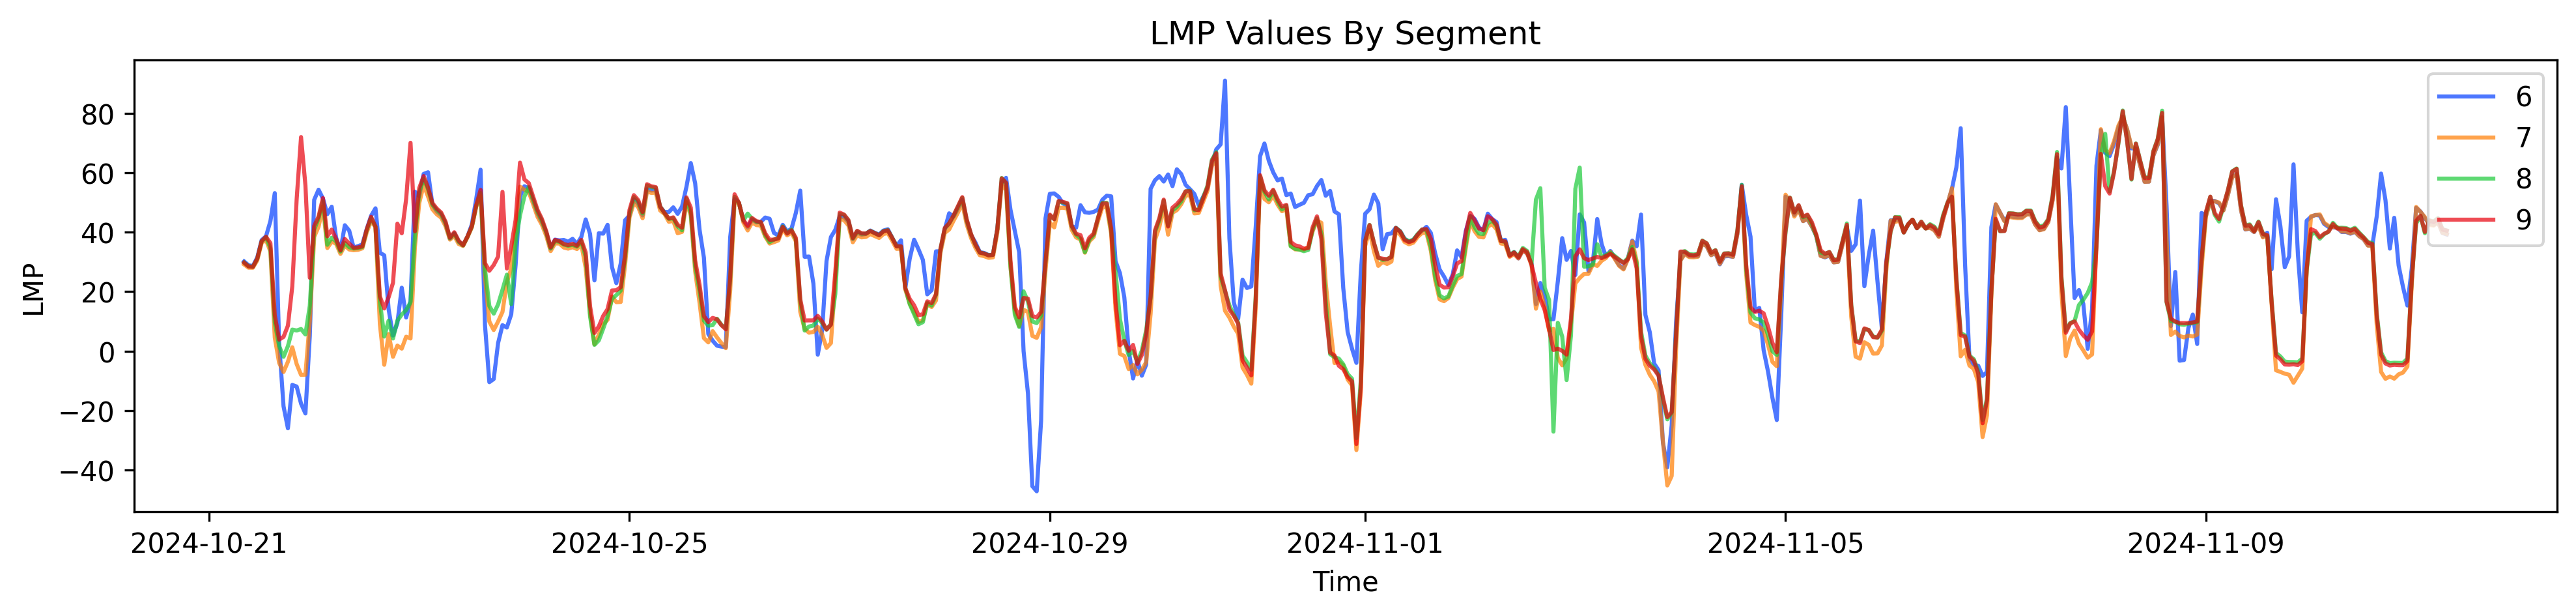

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 3), dpi=300)

sns.lineplot(x='Time', y='Actual', hue='Segment', data=data, ax=ax, palette='bright', alpha=0.7)  # Added alpha=0.7

ax.set_xlabel('Time')
ax.set_ylabel('LMP')
ax.set_title('LMP Values By Segment')
ax.legend(loc='upper right')

plt.show()

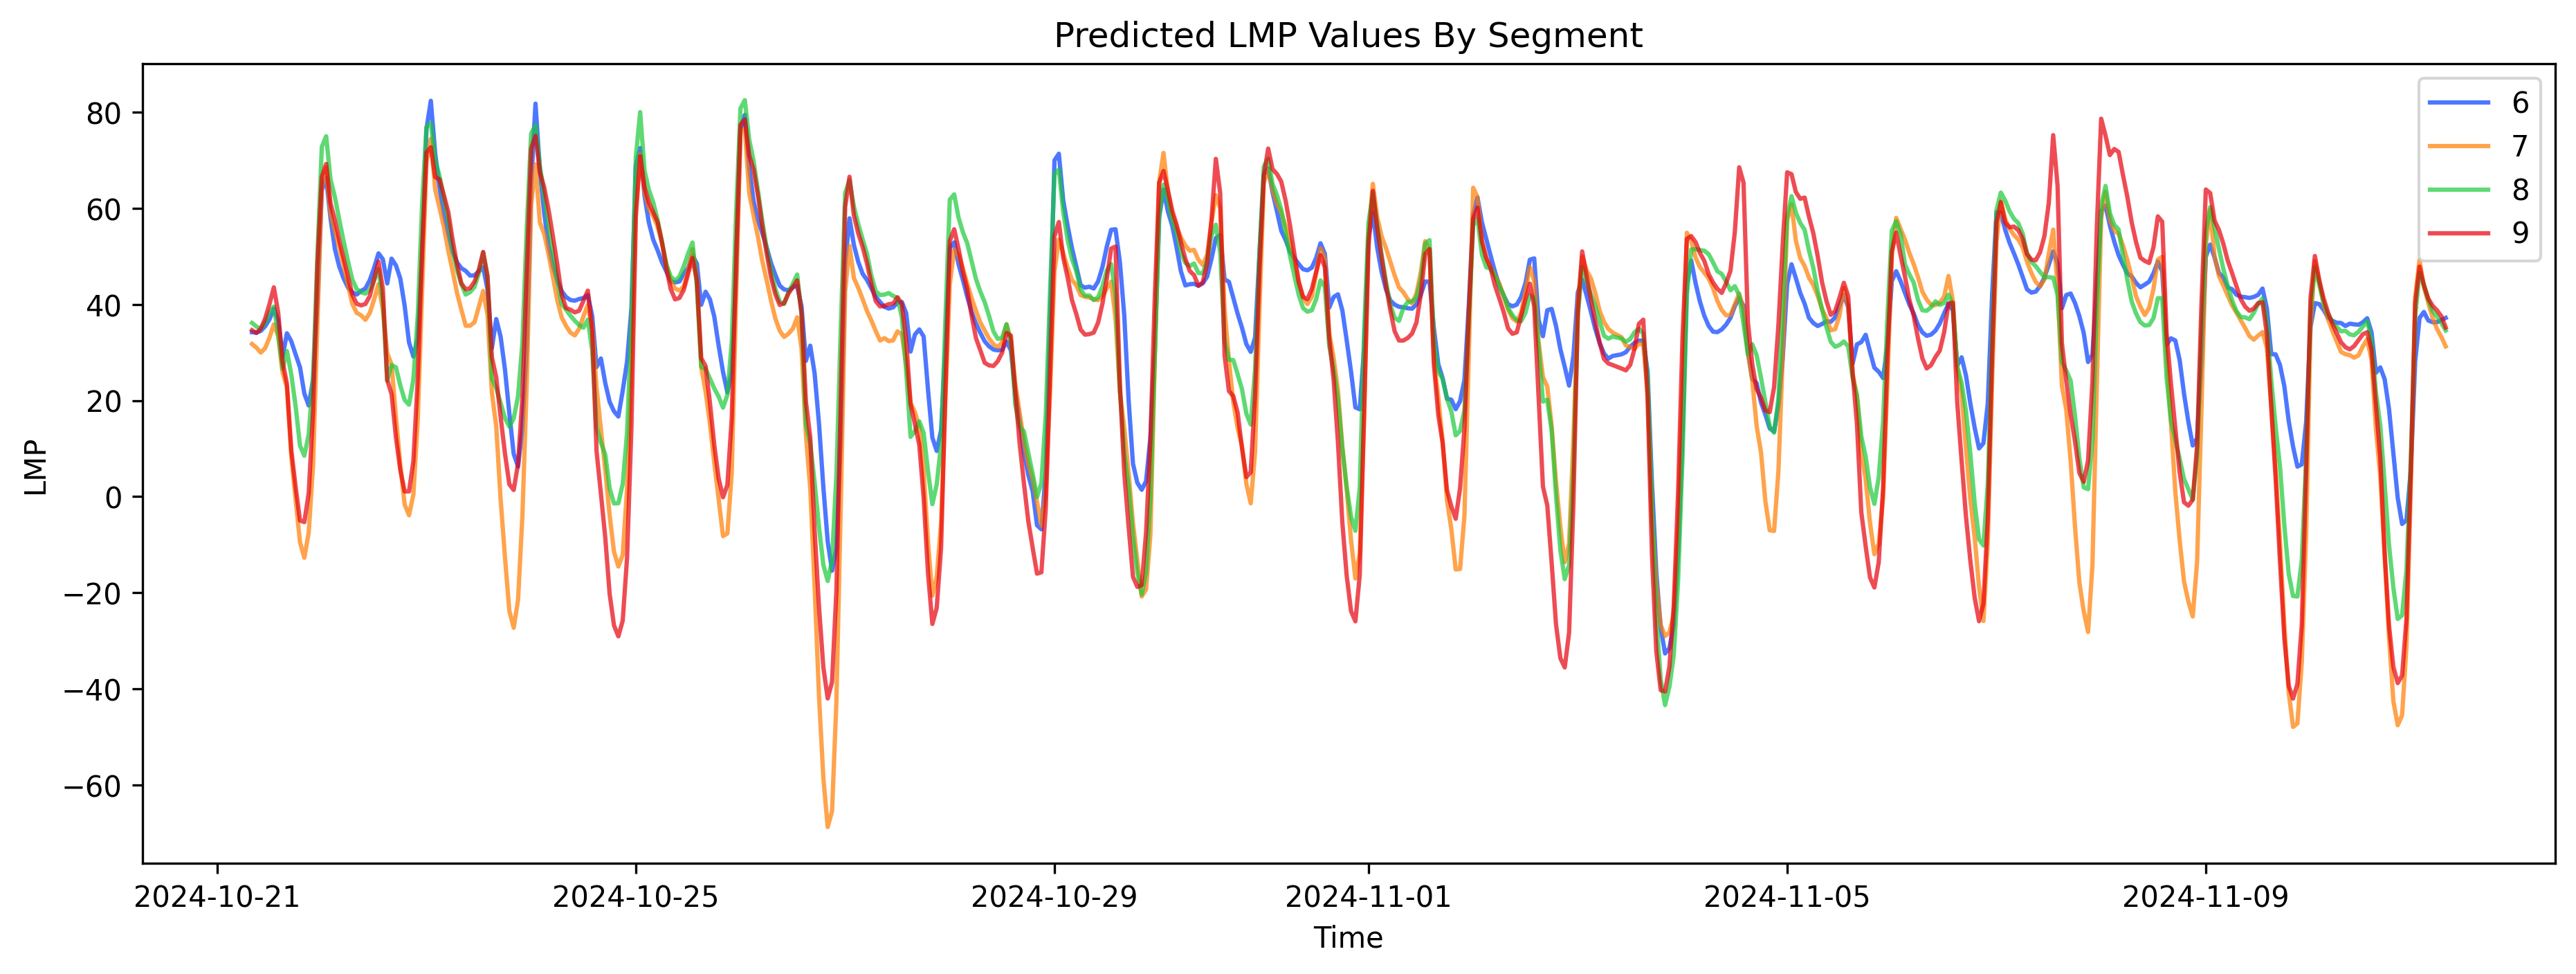

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15, 5), dpi=300)

sns.lineplot(x='Time', y='Predicted', hue='Segment', data=data, ax=ax, palette='bright', alpha=0.7)  # Added alpha=0.7

ax.set_xlabel('Time')
ax.set_ylabel('LMP')
ax.set_title('Predicted LMP Values By Segment')
ax.legend(loc='upper right')

plt.show()

## evaluate rank of predicted price

In [ ]:
def rank_predicted(group):
    group['Predicted Rank'] = group['Predicted'].rank(method='dense', ascending=True)
    return group

data = data.groupby('Time').apply(rank_predicted)

<ipython-input-45-5681e5857008>:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  data = data.groupby('Time').apply(rank_predicted)


In [ ]:
data

Segment                Date     Actual  Predicted  \
Date                                                                          
2024-10-21 08:00:00 0           6 2024-10-21 08:00:00  30.186352  34.219540   
                    503         7 2024-10-21 08:00:00  29.157888  31.757557   
                    1006        8 2024-10-21 08:00:00  29.805435  36.151489   
                    1509        9 2024-10-21 08:00:00  29.759118  34.632782   
2024-10-21 09:00:00 1           6 2024-10-21 09:00:00  28.886118  34.123508   
...                           ...                 ...        ...        ...   
2024-11-11 06:00:00 2010        9 2024-11-11 06:00:00  40.902581  37.560642   
2024-11-11 07:00:00 502         6 2024-11-11 07:00:00  39.238622  37.201572   
                    1005        7 2024-11-11 07:00:00  39.349959  31.266689   
                    1508        8 2024-11-11 07:00:00  40.581741  34.570522   
                    2011        9 2024-11-11 07:00:00  40.526686  35.201511   

                          Predicted Rank  
Date                                      
2024-10-21 08:00:00 0                2.0  
                    503              1.0  
                    1006             4.0  
                    1509             3.0  
2024-10-21 09:00:00 1                3.0  
...                                  ...  
2024-11-11 06:00:00 2010             4.0  
2024-11-11 07:00:00 502              4.0  
                    1005             1.0  
                    1508             2.0  
                    2011             3.0  

[2012 rows x 5 columns]

In [ ]:
ActualSegment_df = data[data['Actual Rank'] == 1.0]
ActualSegment_df['Actual'].describe()

count    503.000000
mean      27.121331
std       22.174807
min      -47.125690
25%        8.799623
50%       34.672885
75%       42.234795
max       78.738224
Name: Actual, dtype: float64

In [ ]:
PredictedSegment_df = data[data['Predicted Rank'] == 1.0]
PredictedSegment_df['Actual'].describe()

PredictedSegment_df

Segment                Time     Actual  Predicted  \
Time                                                                          
2024-10-21 08:00:00 503         7 2024-10-21 08:00:00  29.157888  31.757557   
2024-10-21 09:00:00 504         7 2024-10-21 09:00:00  28.077375  31.014717   
2024-10-21 10:00:00 505         7 2024-10-21 10:00:00  28.052268  29.977510   
2024-10-21 11:00:00 506         7 2024-10-21 11:00:00  30.529160  30.874077   
2024-10-21 12:00:00 507         7 2024-10-21 12:00:00  36.425822  33.086647   
...                           ...                 ...        ...        ...   
2024-11-11 03:00:00 498         6 2024-11-11 03:00:00  42.813317  36.663708   
2024-11-11 04:00:00 499         6 2024-11-11 04:00:00  42.460774  36.305996   
2024-11-11 05:00:00 1003        7 2024-11-11 05:00:00  43.350136  34.907608   
2024-11-11 06:00:00 1004        7 2024-11-11 06:00:00  39.778699  33.248764   
2024-11-11 07:00:00 1005        7 2024-11-11 07:00:00  39.349959  31.266689   

                          Predicted Rank  
Time                                      
2024-10-21 08:00:00 503              1.0  
2024-10-21 09:00:00 504              1.0  
2024-10-21 10:00:00 505              1.0  
2024-10-21 11:00:00 506              1.0  
2024-10-21 12:00:00 507              1.0  
...                                  ...  
2024-11-11 03:00:00 498              1.0  
2024-11-11 04:00:00 499              1.0  
2024-11-11 05:00:00 1003             1.0  
2024-11-11 06:00:00 1004             1.0  
2024-11-11 07:00:00 1005             1.0  

[503 rows x 5 columns]

### compare prediction vs actual mean

In [ ]:
# Reset index of PredictedSegment_df['Actual'] to a simple numerical index
# starting from 0 to ensure it aligns with mean_actual_by_time 
mean_actual_by_time['Actual Prediction'] = PredictedSegment_df['Actual'].reset_index(drop=True)
mean_actual_by_time = mean_actual_by_time.rename(columns={'Actual': 'LMP Mean', 'Actual Prediction': 'LMP of Prediction'})
mean_actual_by_time

Time   LMP Mean  LMP of LSTM Prediction  LMP of Prediction
0   2024-10-21 08:00:00  29.727198               29.157888          29.157888
1   2024-10-21 09:00:00  28.508154               28.077375          28.077375
2   2024-10-21 10:00:00  28.346082               28.052268          28.052268
3   2024-10-21 11:00:00  31.045536               30.529160          30.529160
4   2024-10-21 12:00:00  36.920496               36.425822          36.425822
..                  ...        ...                     ...                ...
498 2024-11-11 03:00:00  43.296472               42.813317          42.813317
499 2024-11-11 04:00:00  42.934758               42.460774          42.460774
500 2024-11-11 05:00:00  44.046818               43.350136          43.350136
501 2024-11-11 06:00:00  40.359173               39.778699          39.778699
502 2024-11-11 07:00:00  39.924252               39.349959          39.349959

[503 rows x 4 columns]

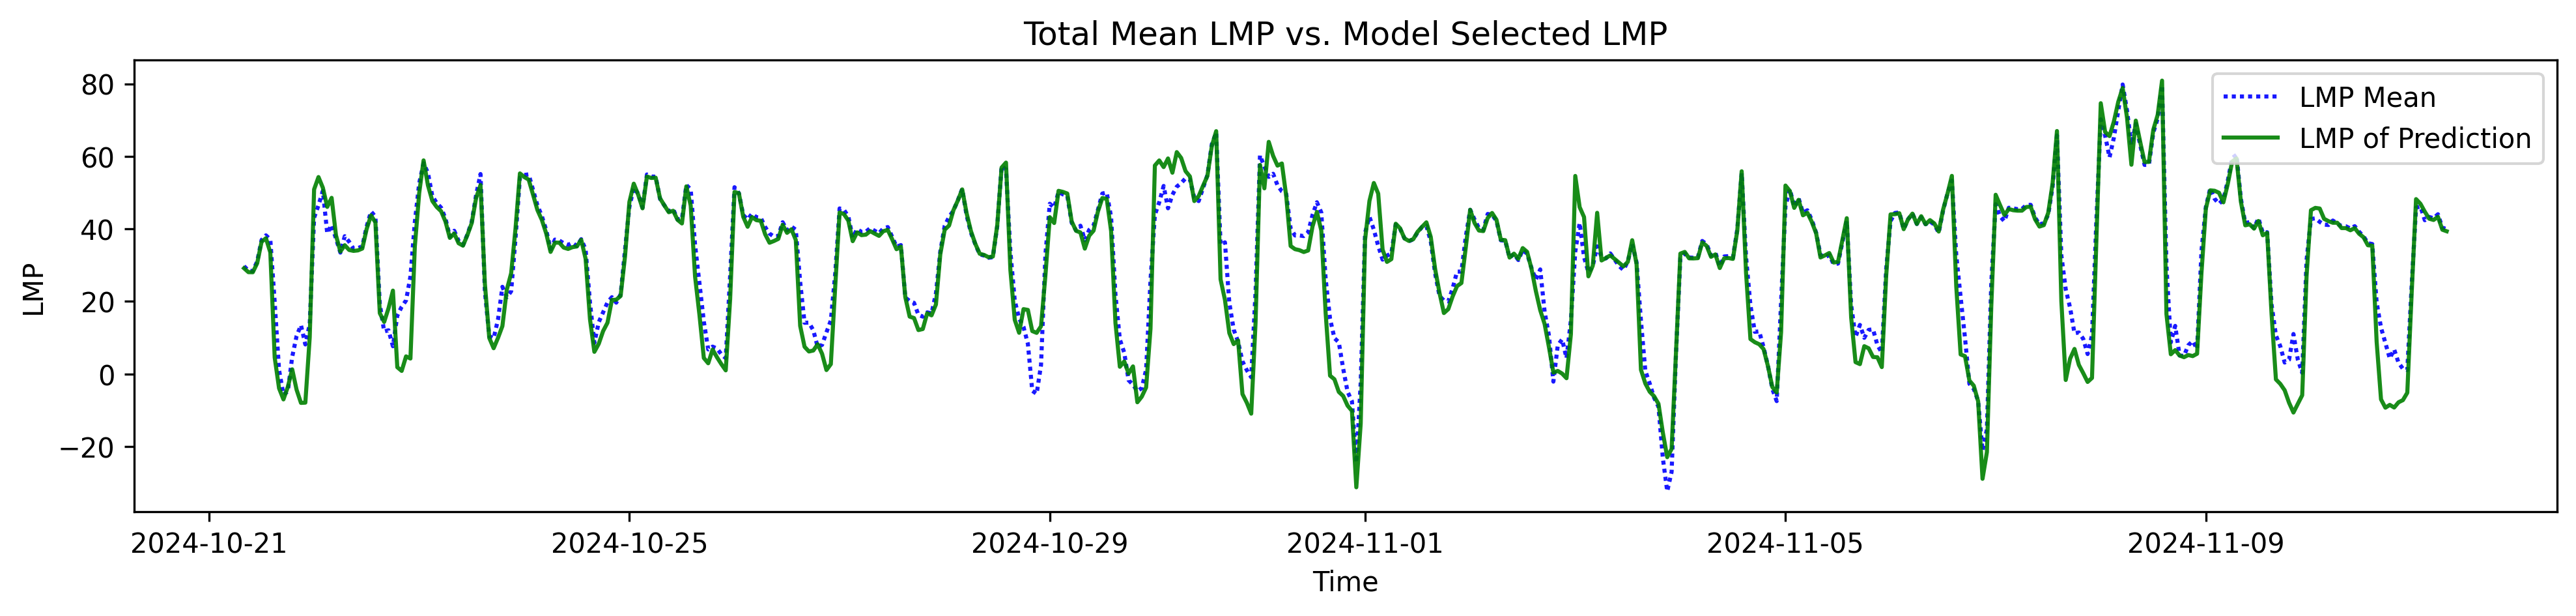

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(16, 3), dpi=300)

melted_df = mean_actual_by_time.melt(id_vars=['Time'], value_vars=['LMP Mean', 'LMP of Prediction'], var_name='Variable', value_name='Value')

sns.lineplot(x='Time', y='Value', hue='Variable', data=melted_df, ax=ax,
             palette={'LMP Mean': 'blue', 'LMP of Prediction': 'green'},  # Set green for 'LMP of Prediction'
             style='Variable', dashes={'LMP Mean': (1, 1), 'LMP of Prediction': ''}, alpha=0.9)

ax.set_xlabel('Time')
ax.set_ylabel('LMP')
ax.set_title('Total Mean LMP vs. Model Selected LMP')
ax.legend(loc='upper right')

plt.show()

In [ ]:
data['Actual'].describe()

count    2012.000000
mean       31.825676
std        20.034091
min       -47.125690
25%        17.881098
50%        37.101699
75%        44.698800
max        90.983884
Name: Actual, dtype: float64

### compare each segment with prediction vs actual

In [ ]:
data6 = data[data['Segment'] == 6]
data7 = data[data['Segment'] == 7]
data8 = data[data['Segment'] == 8]
data9 = data[data['Segment'] == 9]

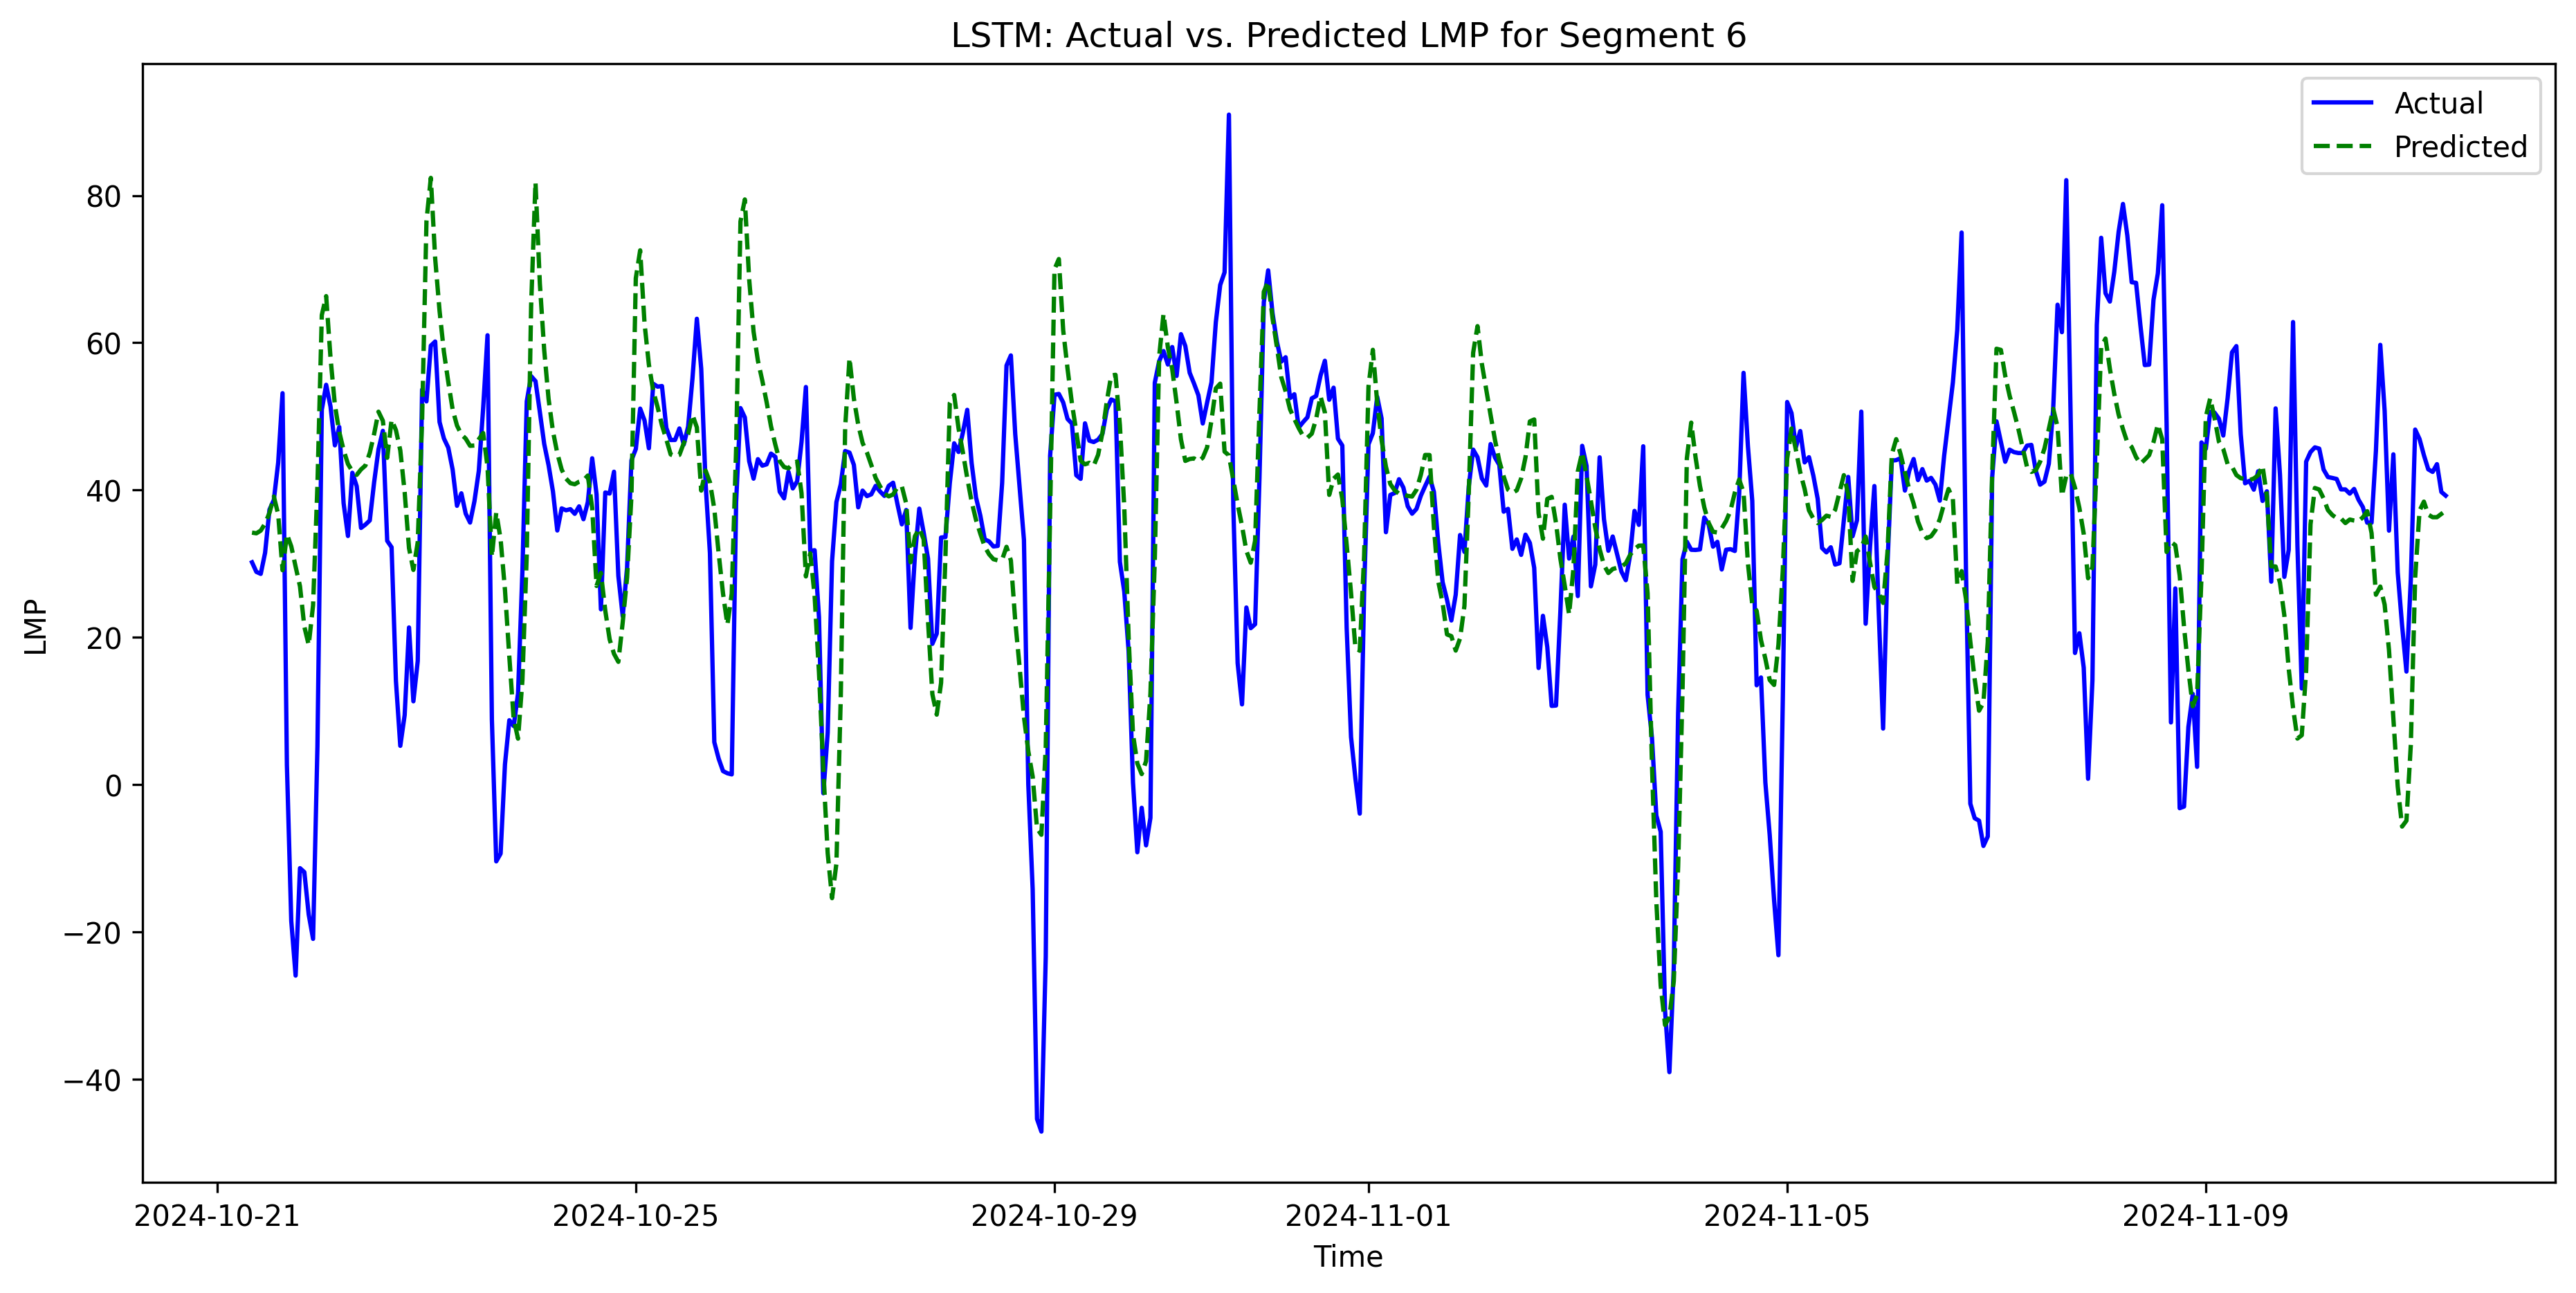

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7), dpi=300)

ax.plot(data6['Time'], data6['Actual'], label='Actual', color='blue')
ax.plot(data6['Time'], data6['Predicted'], label='Predicted', color='green', linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('LMP')
ax.set_title('LSTM: Actual vs. Predicted LMP for Segment 6')
ax.legend()

plt.show()

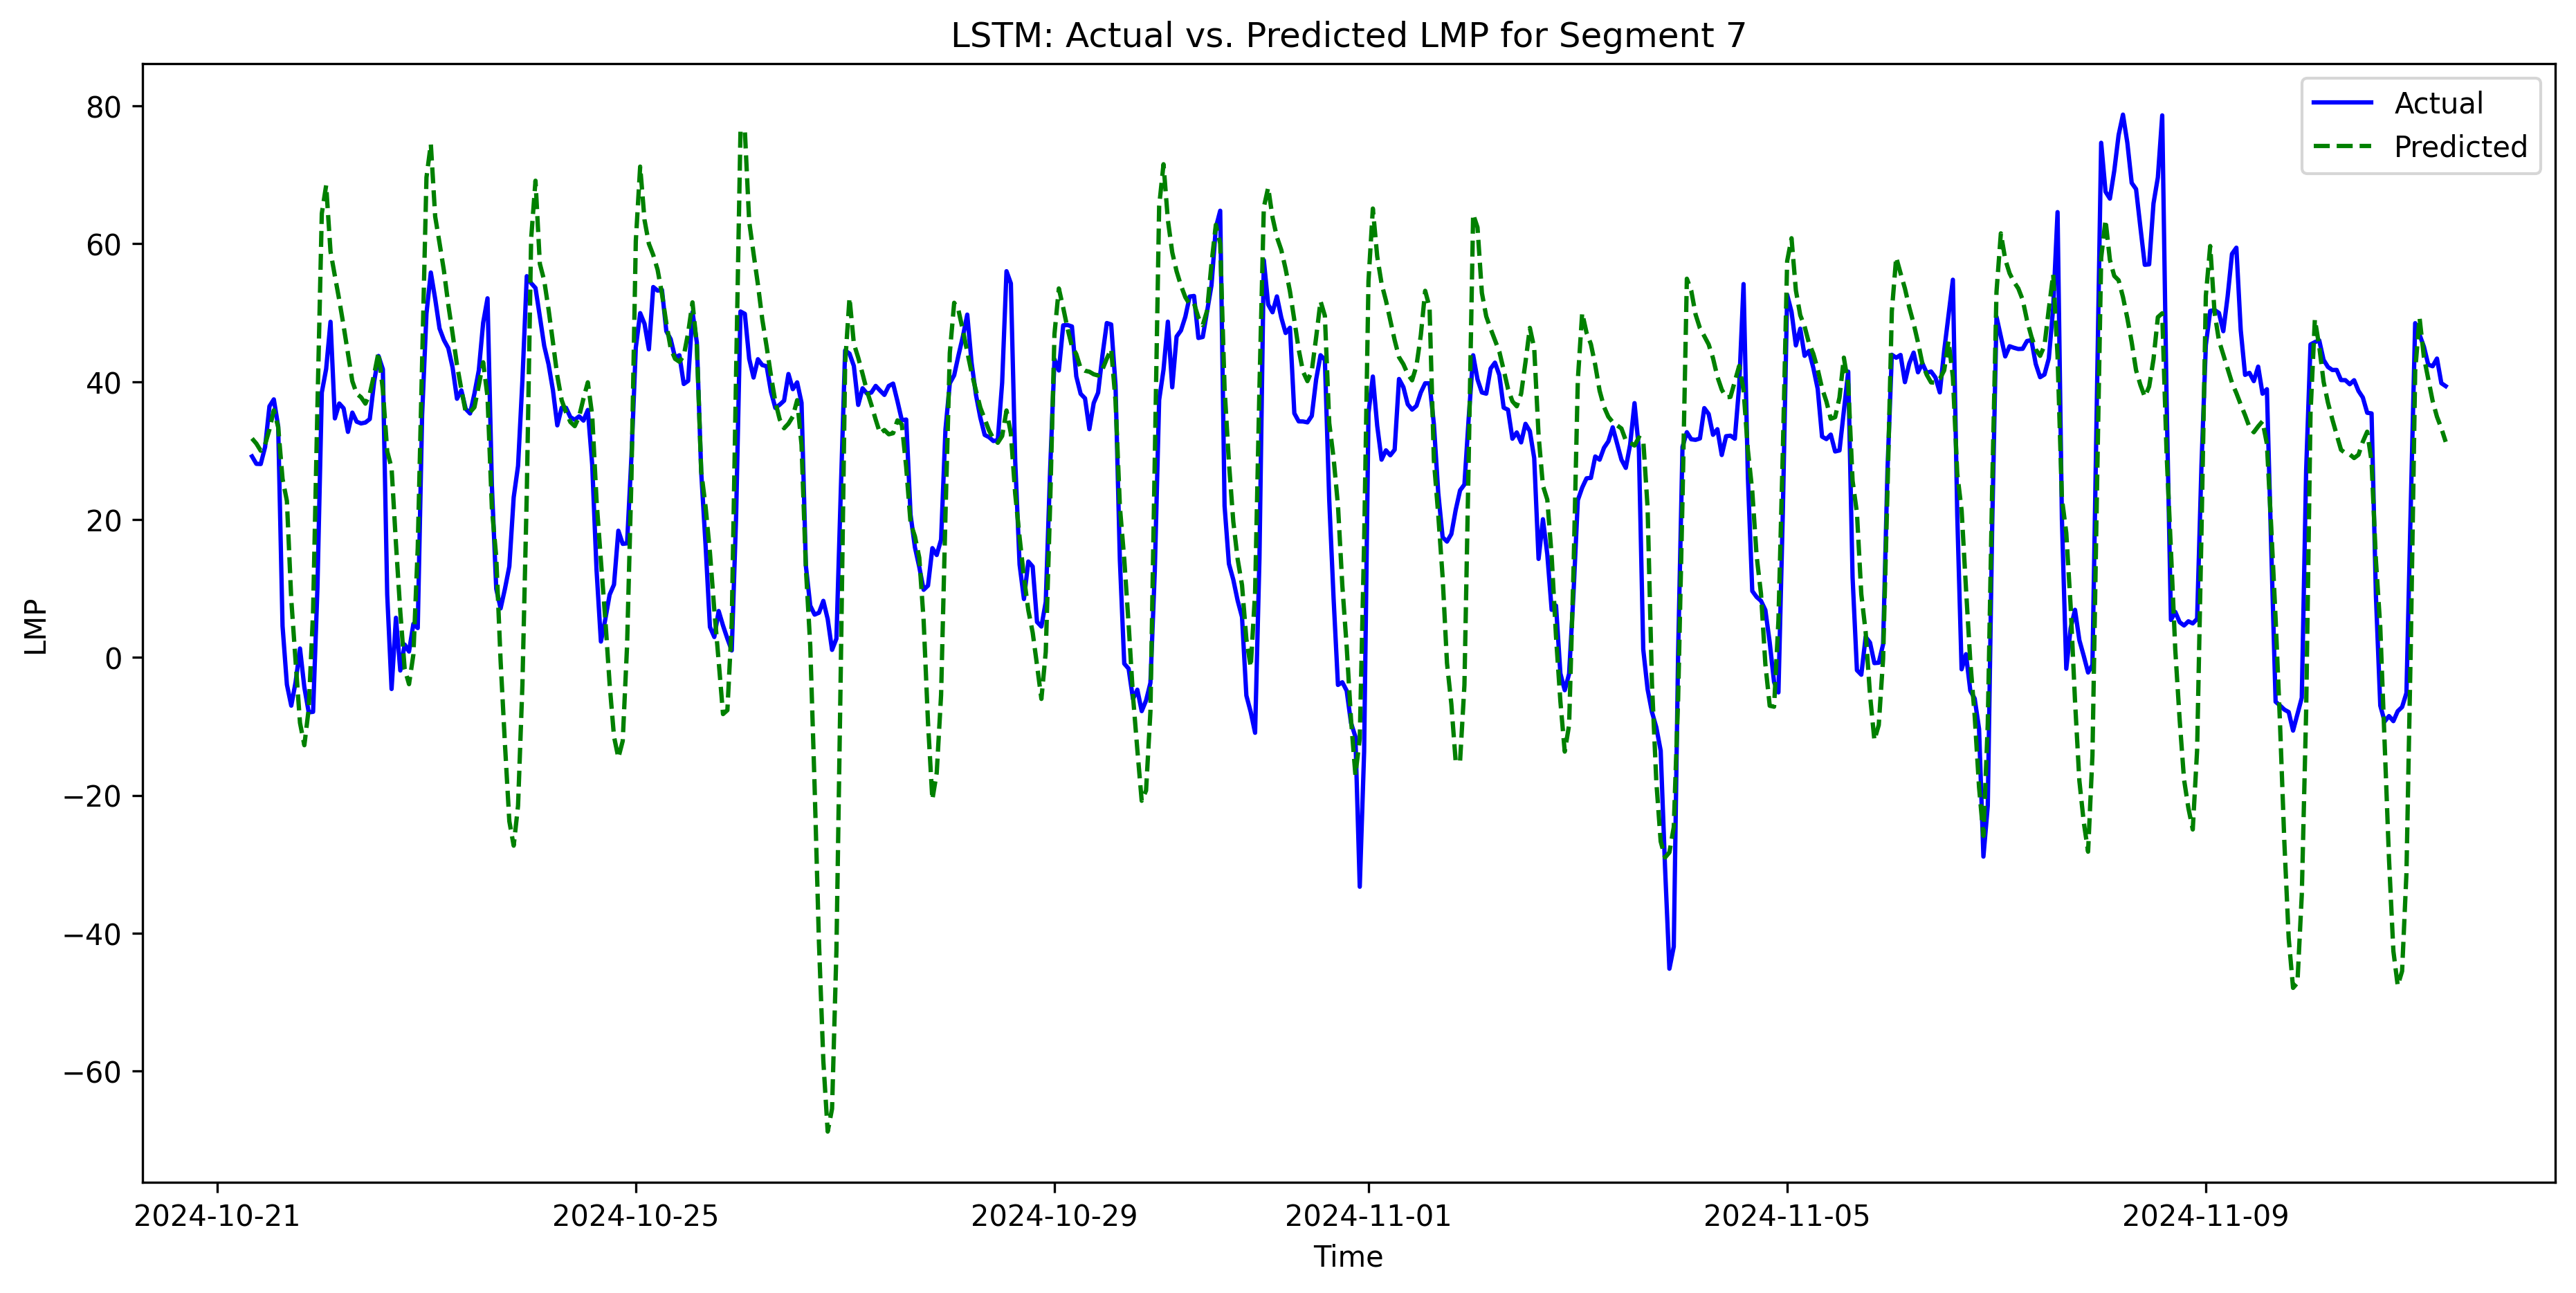

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7), dpi=300)

ax.plot(data7['Time'], data7['Actual'], label='Actual', color='blue')
ax.plot(data7['Time'], data7['Predicted'], label='Predicted', color='green', linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('LMP')
ax.set_title('LSTM: Actual vs. Predicted LMP for Segment 7')
ax.legend()

plt.show()

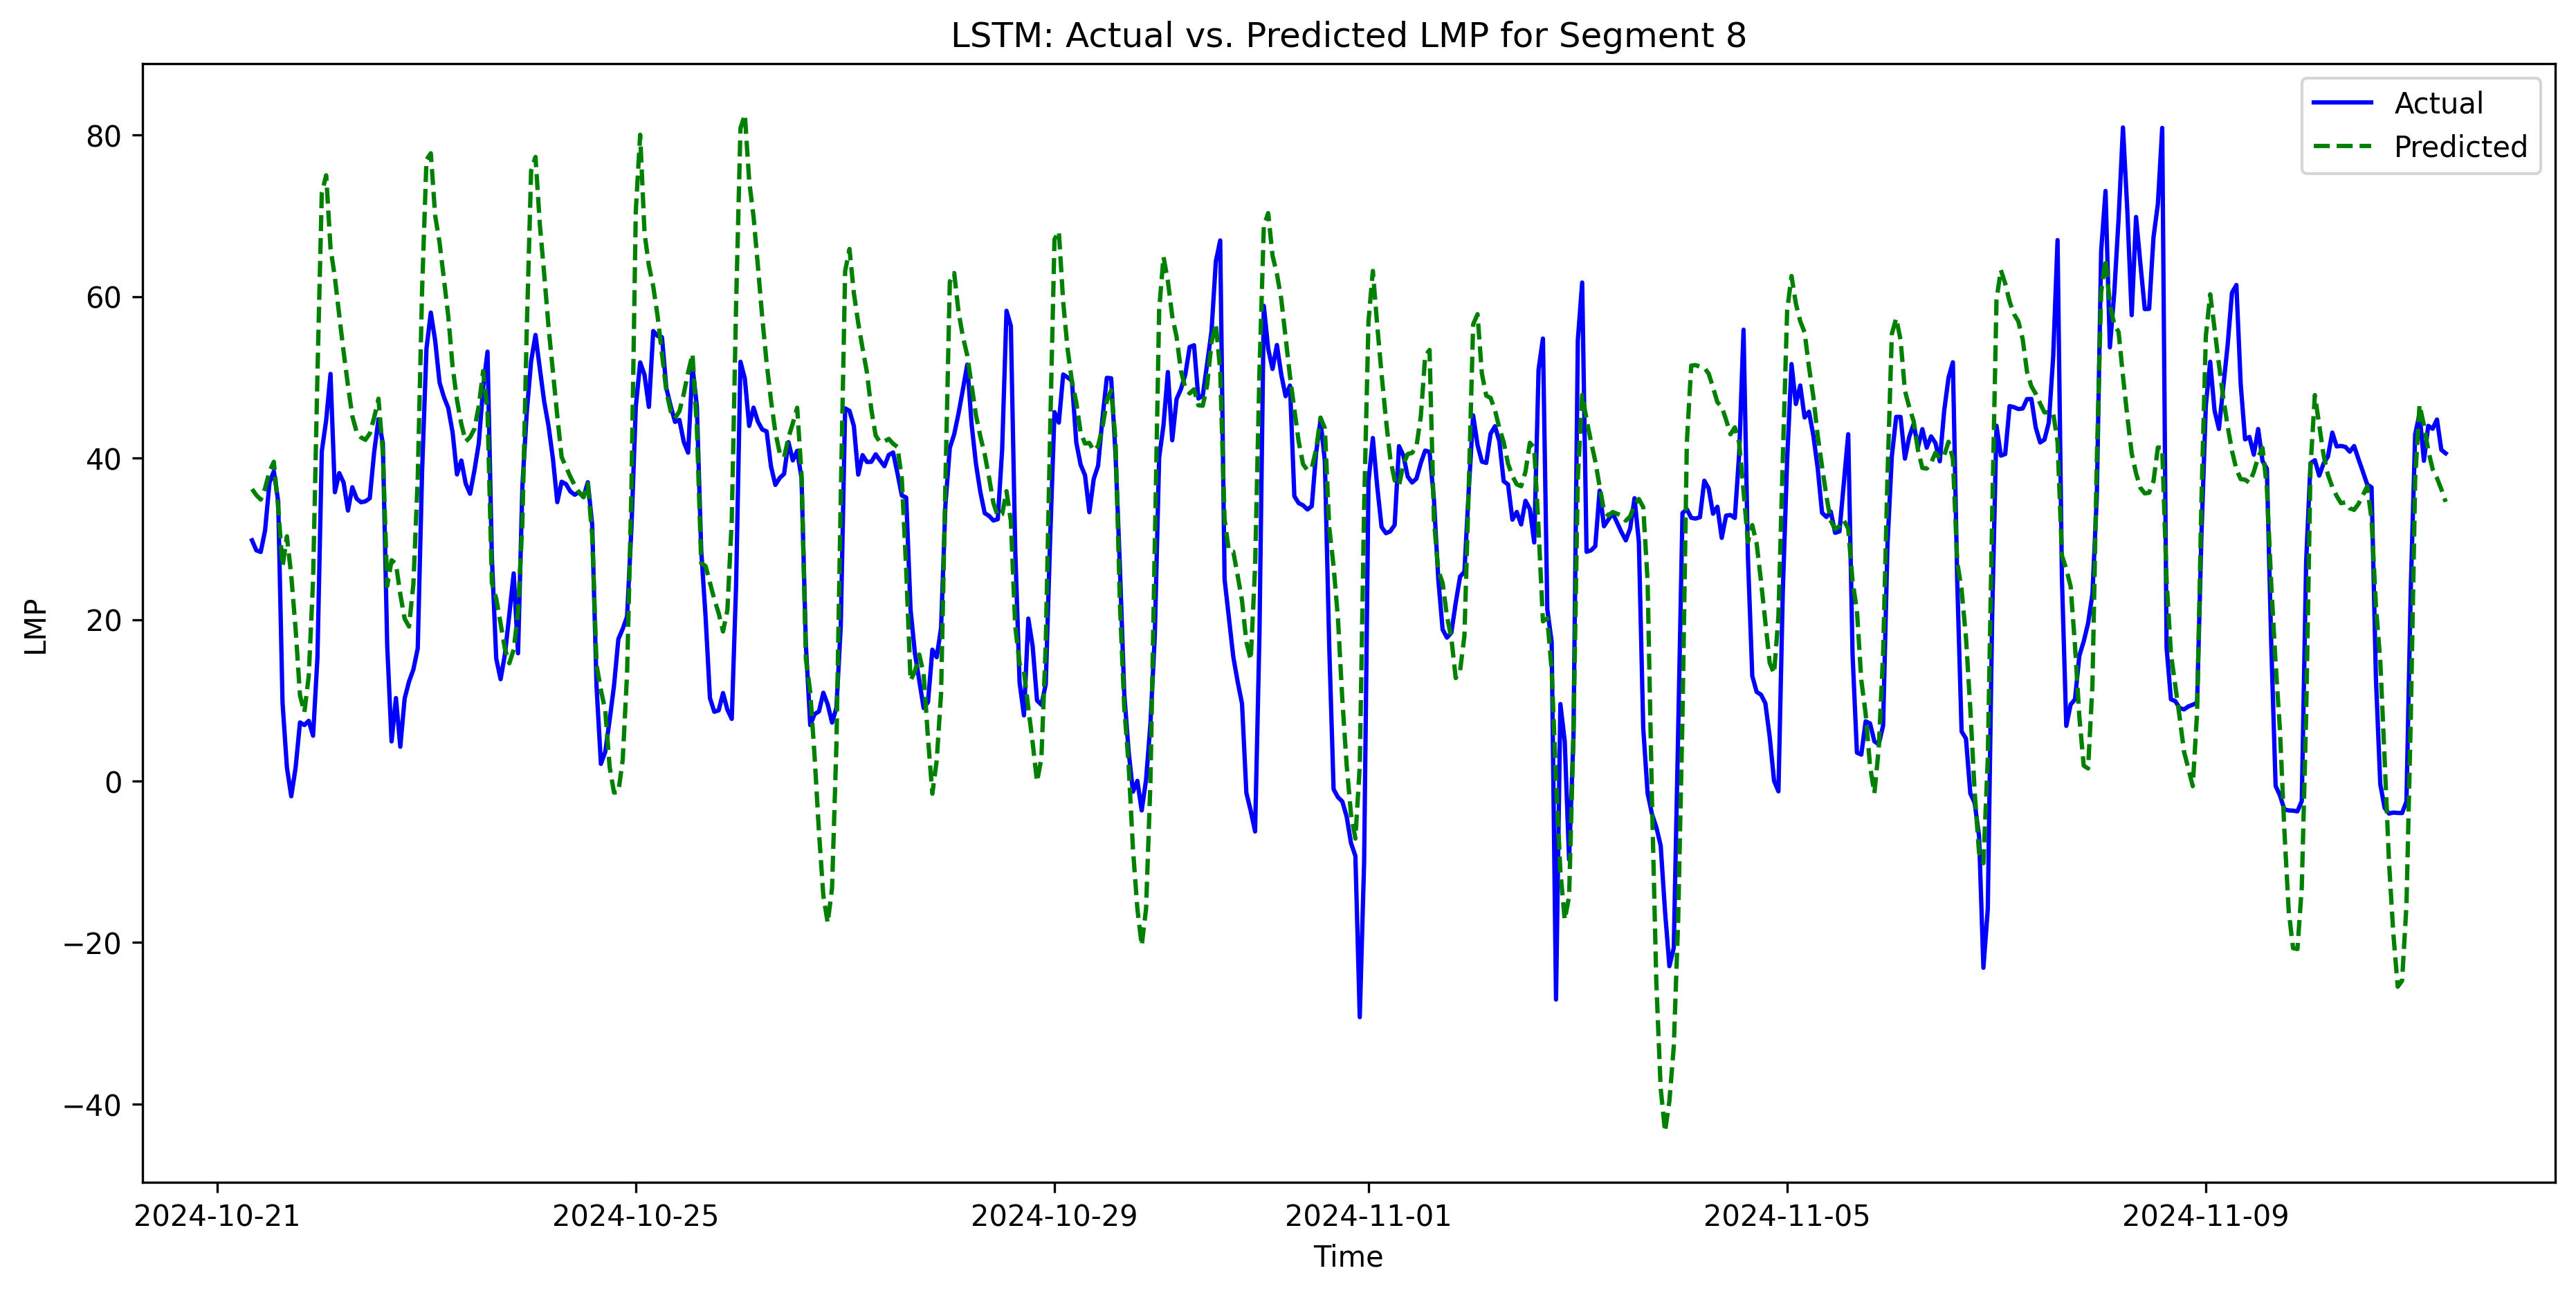

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7), dpi=300)

ax.plot(data8['Time'], data8['Actual'], label='Actual', color='blue')
ax.plot(data8['Time'], data8['Predicted'], label='Predicted', color='green', linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('LMP')
ax.set_title('LSTM: Actual vs. Predicted LMP for Segment 8')
ax.legend()

plt.show()

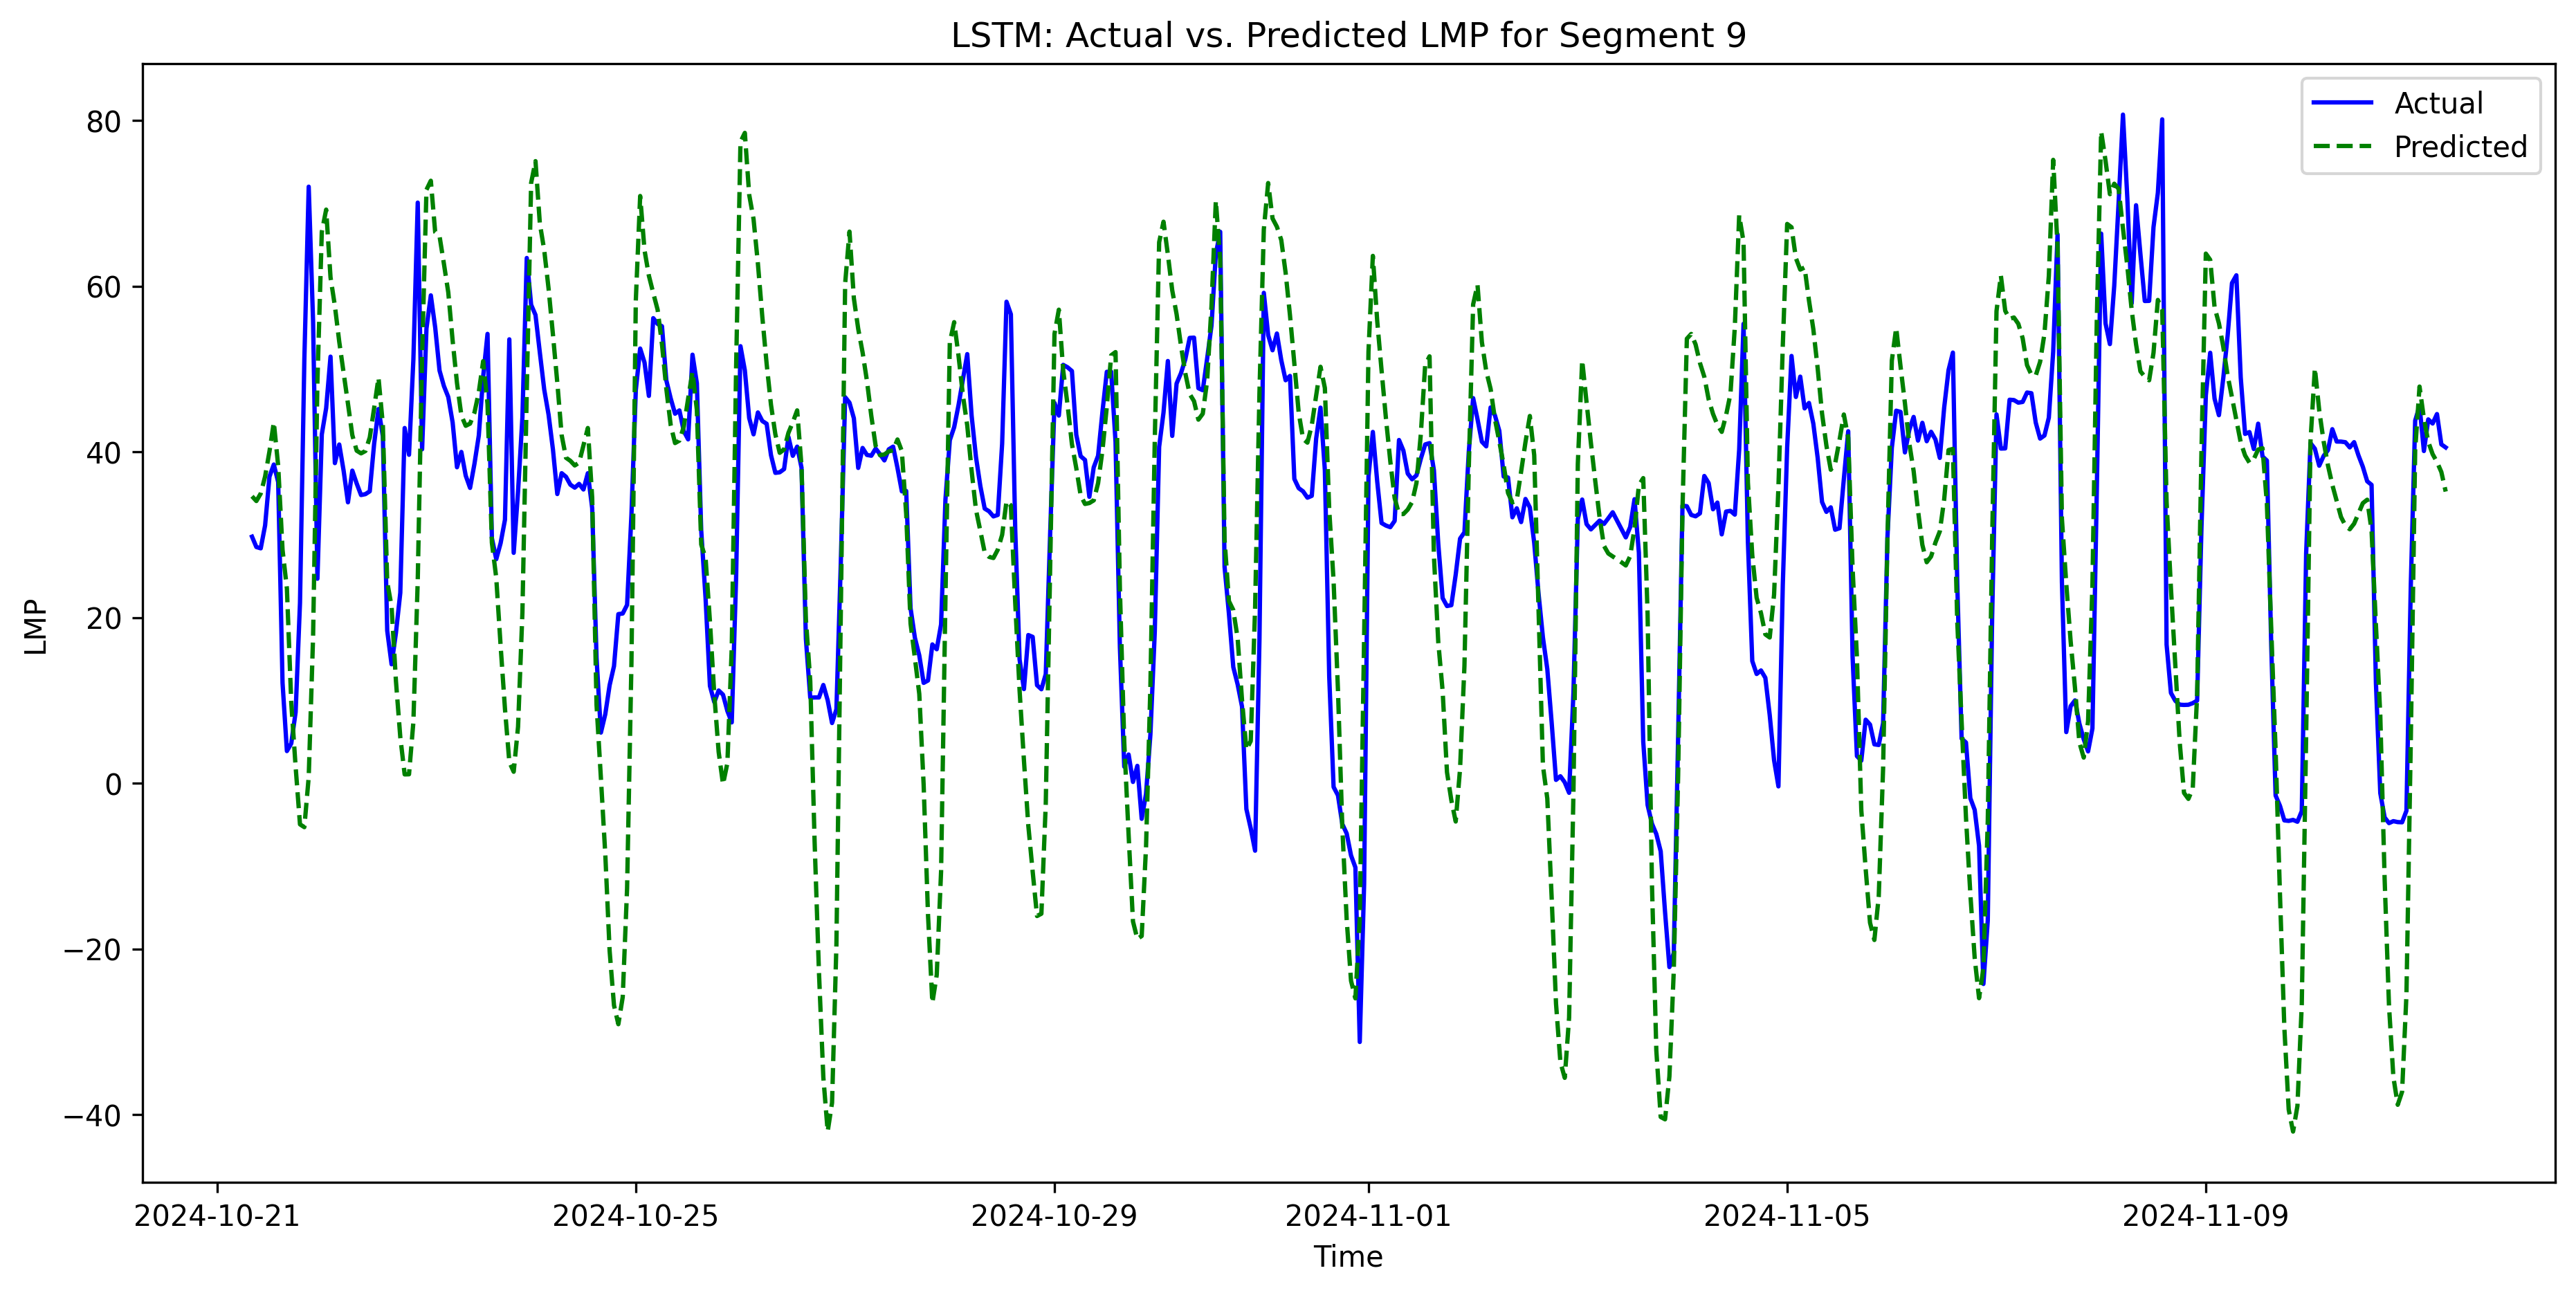

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15, 7), dpi=300)

ax.plot(data9['Time'], data9['Actual'], label='Actual', color='blue')
ax.plot(data9['Time'], data9['Predicted'], label='Predicted', color='green', linestyle='--')

ax.set_xlabel('Time')
ax.set_ylabel('LMP')
ax.set_title('LSTM: Actual vs. Predicted LMP for Segment 9')
ax.legend()

plt.show()

In [ ]:
import numpy as np

grouped_data = data.groupby('Segment')
rmse_values = grouped_data.apply(lambda x: np.sqrt(np.mean((x['Actual'] - x['Predicted'])**2)))
print(rmse_values)

Segment
6    15.096201
7    14.977289
8    13.078254
9    15.958361
dtype: float64


<ipython-input-52-d5e1273e3649>:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  rmse_values = grouped_data.apply(lambda x: np.sqrt(np.mean((x['Actual'] - x['Predicted'])**2)))
